# **HuggingFace 🤗 RoBERTa Model for Identify Informative COVID-19 English Tweets**


# Before we can browse the rest of the notebook, we need to install the **tensorflow** version=2.7.0 and **hugging face transformers**- latest Version. 

In [ ]:
!pip install tensorflow==2.7.0
!pip install -q transformers

     |████████████████████████████████| 489.6 MB 21 kB/s 
     |████████████████████████████████| 1.3 MB 40.8 MB/s 
     |████████████████████████████████| 463 kB 32.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0
     |████████████████████████████████| 3.5 MB 5.5 MB/s 
     |████████████████████████████████| 596 kB 53.6 MB/s 
     |████████████████████████████████| 895

# Configure TPU environment in Google Colab For training custom datset on fine tuning pre pre trained Hugging Face **Roberta** Model.

In [ ]:
# detect and init the TPU
import tensorflow as tf 

tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

batch_size=32 * tpu_strategy.num_replicas_in_sync
print('Batch size:', batch_size)
AUTOTUNE = tf.data.experimental.AUTOTUNE


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.46.78.50:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.46.78.50:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Batch size: 256


In [ ]:
import re
import string
import nltk
import numpy as np
import pandas as pd
nltk.download('stopwords')
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(17,13))
import seaborn as sns
sns.set_style('darkgrid')
#import plotly.express as ex
from plotly.subplots import make_subplots
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import datetime
import warnings
warnings.filterwarnings("ignore")
print("Library Setup Complete.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
Library Setup Complete.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Load the data 
convert the data into pandas Data frame

In [ ]:
import pandas as pd
vaccine_filepath = '/test.tsv'
train_file='/content/train.tsv'
test_file='/content/test.tsv'
validation_file= '/content/valid.tsv'
unlabeled= '/content/unlabeled_test_with_noise.tsv'


train_data = pd.read_csv(train_file, sep='\t',names=["Text", "Label"])
test_data= pd.read_csv(test_file, sep='\t',names=["Text", "Label"])
validation_data= pd.read_csv(validation_file, sep='\t',names=["Text", "Label"])
print("Read Complete.")

Read Complete.


# Pre Processing


Before we can feed those texts to our model, we need to preprocess them. 


*   Convert the text into Lower case
*   Remove punctuation


*   Single character and double space removal
*   Stopword Removal


*   Emoji Removal
*   Convert the label to one hot encoding for training





In [ ]:
# Lowercase
train_data['Text'] = train_data['Text'].str.lower()
test_data['Text'] = test_data['Text'].str.lower()
validation_data['Text'] = validation_data['Text'].str.lower()

train_data['Text']

Id                                                                  text
1241490299215634434    official death toll from #covid19 in the unite...
1245916400981381130    dearest mr. president @user 1,169 coronavirus ...
1241132432402849793    latest updates march 20 ⚠️5274 new cases and 3...
1236107253666607104    真把公主不当干部 breaking: 21 people on grand princess...
                                             ...                        
1241325232415105025    .@user makes major announcement in view of #co...
1235624084089778176    ❌question ... did they receive a ventilator wh...
1246018213995044870    cmt will air a special celebrating the life&am...
1239750367329439744    current 🇮🇩 covid19 testing procedure only test...
1241528434624327680    a preview of what’s to come, the further the s...
Name: Text, Length: 6937, dtype: object

In [ ]:
# Punctuation Removal
punctuation_removal = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punctuation_removal))
train_data["Text"] = train_data["Text"].apply(lambda text: remove_punctuation(text))
test_data["Text"] = test_data["Text"].apply(lambda text: remove_punctuation(text))
validation_data["Text"] = validation_data["Text"].apply(lambda text: remove_punctuation(text))
train_data["Text"]

Id                                                                  text
1241490299215634434    official death toll from covid19 in the united...
1245916400981381130    dearest mr president user 1169 coronavirus dea...
1241132432402849793    latest updates march 20 ⚠️5274 new cases and 3...
1236107253666607104    真把公主不当干部 breaking 21 people on grand princess ...
                                             ...                        
1241325232415105025    user makes major announcement in view of coron...
1235624084089778176    ❌question  did they receive a ventilator when ...
1246018213995044870    cmt will air a special celebrating the lifeamp...
1239750367329439744    current 🇮🇩 covid19 testing procedure only test...
1241528434624327680    a preview of what’s to come the further the sp...
Name: Text, Length: 6937, dtype: object

In [ ]:
# Single character and double space removal
train_data["Text"] = train_data["Text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
train_data["Text"] = train_data["Text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))


test_data["Text"] = test_data["Text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
test_data["Text"] = test_data["Text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

validation_data["Text"] = validation_data["Text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
validation_data["Text"] = validation_data["Text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [ ]:
# Stopword Removal
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

train_data["Text"] = train_data["Text"].apply(lambda text: remove_stopwords(text))
test_data["Text"] = test_data["Text"].apply(lambda text: remove_stopwords(text))
validation_data["Text"] = validation_data["Text"].apply(lambda text: remove_stopwords(text))

In [ ]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
    
train_data["Text"] = train_data["Text"].apply(str)
train_data["Text"] = train_data["Text"].apply(remove_emoji)

test_data["Text"] = test_data["Text"].apply(str)
test_data["Text"] = test_data["Text"].apply(remove_emoji)

validation_data["Text"] = validation_data["Text"].apply(str)
validation_data["Text"] = validation_data["Text"].apply(remove_emoji)

In [ ]:
# Single character and double space removal
train_data["Text"] = train_data["Text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
train_data["Text"] = train_data["Text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))


test_data["Text"] = test_data["Text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
test_data["Text"] = test_data["Text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

validation_data["Text"] = validation_data["Text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
validation_data["Text"] = validation_data["Text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [ ]:
y_train= train_data["Label"]
y_train=list(pd.get_dummies(y_train,drop_first=True)['UNINFORMATIVE'])

y_validation=list(pd.get_dummies(validation_data["Label"],drop_first=True)['UNINFORMATIVE'])

y_test= test_data["Label"]
y_test=list(pd.get_dummies(y_test,drop_first=True)['UNINFORMATIVE'])

This notebook can run with any model checkpoint on the [model hub](https://huggingface.co/models) that has a version with a classification head. Here we select [`roberta-base`](https://huggingface.co/roberta-base).

In [ ]:
from transformers import RobertaTokenizer,TFRobertaForSequenceClassification
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

This is done by a 🤗 Transformers Tokenizer which will (as the name indicates) tokenize the inputs (including converting the tokens to their corresponding IDs in the pretrained vocabulary) and put it in a format the model expects, as well as generate the other inputs that model requires.

To do all of this, we instantiate our tokenizer with the RobertaTokenizer.from_pretrained method, which will ensure:

we get a tokenizer that corresponds to the model architecture we want to use, we download the vocabulary used when pretraining this specific checkpoint. That vocabulary will be cached, so it's not downloaded again the next time we run the cell.

In [ ]:
train_texts= list(train_data["Text"].values)
validation_texts= list(validation_data["Text"].values)
test_texts= list(test_data["Text"].values)


train_encodings = tokenizer(train_texts, truncation=True, padding=True,return_tensors='tf')
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='tf')
validation_encodings= tokenizer(validation_texts, truncation=True, padding=True, return_tensors='tf')

# Convert the data to TensorFlow type.

Convert the data to tensorFlow type for training the model in TensorFlow

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

validation_dataset = tf.data.Dataset.from_tensor_slices((
    dict(validation_encodings),
    y_validation
))


test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

# **Fine tunning the model with TensorFlow and TPU** 

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20
217/217 [==============================] - 150s 252ms/step - loss: 0.3431 - accuracy: 0.8524 - val_loss: 0.3596 - val_accuracy: 0.8422
Epoch 2/20
217/217 [==============================] - 38s 175ms/step - loss: 0.1740 - accuracy: 0.9374 - val_loss: 0.4254 - val_accuracy: 0.8531
Epoch 3/20
217/217 [==============================] - 38s 175ms/step - loss: 0.1153 - accuracy: 0.9579 - val_loss: 0.3607 - val_accuracy: 0.8641
Epoch 4/20
217/217 [==============================] - 38s 175ms/step - loss: 0.0767 - accuracy: 0.9722 - val_loss: 0.6018 - val_accuracy: 0.8591
Epoch 5/20
217/217 [==============================] - 38s 176ms/step - loss: 0.0724 - accuracy: 0.9752 - val_loss: 0.5809 - val_accuracy: 0.8661
Epoch 6/20
217/217 [==============================] - 38s 176ms/step - loss: 0.0514 - accuracy: 0.9854 - val_loss: 0.7755 - val_accuracy: 0.8382
Epoch 7/20
217/217 [==============================] - 38s 175ms/step - loss: 0.0430 - accuracy: 0.9870 - val_loss: 0.6702 - val_a

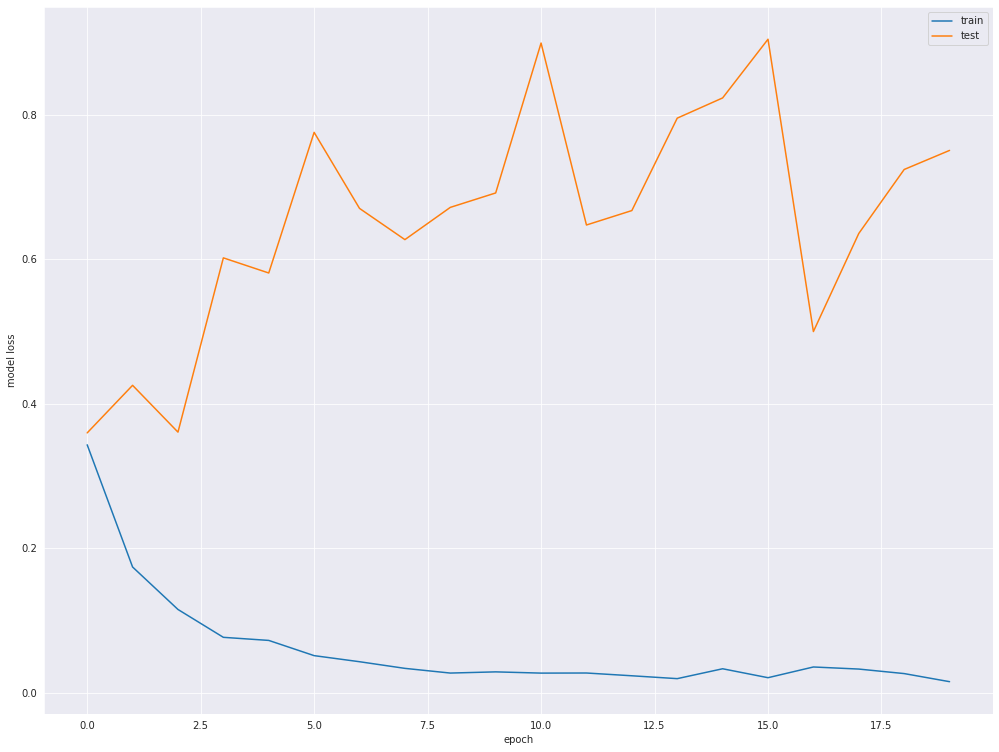

In [ ]:
with tpu_strategy.scope(): 
  model = TFRobertaForSequenceClassification.from_pretrained('roberta-base') 
  optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5) 
  model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy']) # can also use any keras loss fn

history= model.fit(train_dataset.shuffle(1000).batch(32), validation_data=validation_dataset.batch(64),epochs=20, batch_size=1)

model.save_weights('./saved_weights.h5')

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])

plt.ylabel('model loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='best') 
plt.savefig('train_history.png')
plt.show()

create custom function for confusion Matrix

In [ ]:
def plot_cm(cf_matrix):

    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');


    ## Display the visualization of the Confusion Matrix.
    plt.show()


# Evaluting the model



*   Load the weight from the training Model
*   Evaluating the Model with test dataset

*   Create Confusion Matrix on test set.
*   Create classification Report on test set.





conf_matrix  tf.Tensor(
[[778 167]
 [143 913]], shape=(2, 2), dtype=int32)


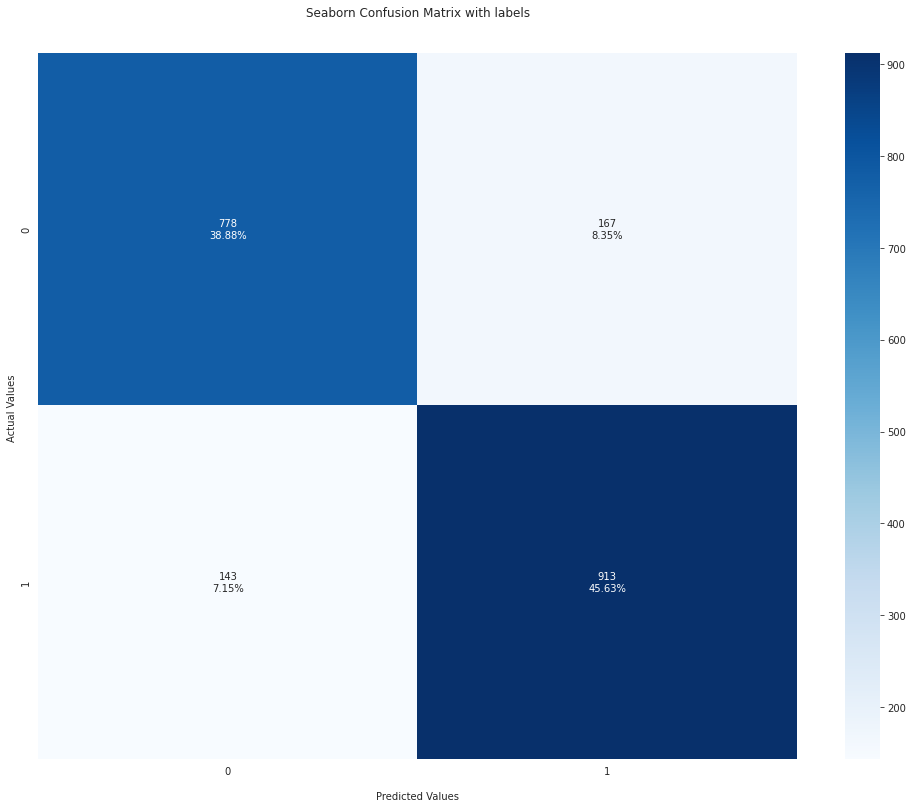

Precision:0.8450698284589158, Recall:0.8450774612693653, F1 score:0.8449515261878436.
               precision    recall  f1-score   support

  INFORMATIVE       0.84      0.82      0.83       945
UNINFORMATIVE       0.85      0.86      0.85      1056

     accuracy                           0.85      2001
    macro avg       0.85      0.84      0.84      2001
 weighted avg       0.85      0.85      0.84      2001



In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

labels=['INFORMATIVE','UNINFORMATIVE']

model.load_weights('./saved_weights.h5')
preds = model.predict(test_dataset.batch(32),batch_size=1)
pred_labels = np.argmax(preds.logits, axis=1)
conf_matrix = tf.math.confusion_matrix(y_test,pred_labels,)
print('conf_matrix ',conf_matrix)
conf_matrix= np.array(conf_matrix)
plot_cm(conf_matrix)

precision=metrics.precision_score(y_test, pred_labels, average='weighted')
recall=metrics.recall_score(y_test, pred_labels, average='weighted')
f1=metrics.f1_score(y_test, pred_labels, average='weighted')
print('Precision:{}, Recall:{}, F1 score:{}.'.format(precision, recall, f1))
print(classification_report(y_test,pred_labels,target_names=labels))

